In [4]:
!pip install xlrd

In [81]:
!pip install parse

  Created wheel for parse: filename=parse-1.18.0-py3-none-any.whl size=24138 sha256=ba8413a5cff9a7228d4fef20a692d99c25d601568fb4d85ebaf3c01cb7e7b449
  Stored in directory: c:\users\14686\appdata\local\pip\cache\wheels\05\d6\62\d7e3a31cb5ac82c57423e083738882b792a9108b30cc05f579
Successfully built parse


In [18]:
import pandas as pd
import numpy as np
import parse

import pylab as plt

In [2]:
df = pd.read_excel("附件一：325个样本数据.xlsx", skiprows=[0, 1])

In [3]:
columns = pd.Series(df.columns)
columns[:2] = ["sample_index", "time"]
df.columns = columns

In [4]:
df.head()

,sample_index,time,"硫含量,μg/g",辛烷值RON,"饱和烃,v%（烷烃+环烷烃）","烯烃,v%","芳烃,v%","溴值\n,gBr/100g","密度(20℃),\nkg/m³","硫含量,μg/g.1",...,再生器藏量,加氢裂化轻石脑油进装置流量,汽油产品去气分流量,加氢裂化轻石脑油进装置累积流量,汽油产品去气分累积流量,8.0MPa氢气至循环氢压缩机入口,8.0MPa氢气至循环氢压缩机入口.1,8.0MPa氢气至反吹氢压缩机出口,8.0MPa氢气至反吹氢压缩机出口.1,D101原料缓冲罐压力
0,1,2020/5/26 8:00:00,188.0,90.6,53.230000,24.400000,22.370000,61.487143,726.085714,3.2,...,2.045436,6368.74700,233.310805,83086802.0,832503.795,2216.40935,39063124.5,1840.14470,39608757.0,0.353271
1,2,2020/5/21 8:00:00,169.0,90.5,52.300000,26.400000,21.300000,61.880000,731.300000,3.2,...,2.025974,6360.64530,242.369205,82318954.0,803462.665,2370.58740,38810581.5,1641.73260,39389299.0,0.354504
2,3,2020/5/19 8:00:00,177.0,90.7,52.300000,26.314286,21.385714,61.722857,729.614286,3.2,...,1.964696,6504.96490,233.076925,82012004.0,791925.055,2326.46535,38693812.0,1600.67575,39312616.5,0.350181
3,4,2020/5/14 8:00:00,159.0,90.4,52.300000,26.100000,21.600000,61.330000,725.400000,3.2,...,2.039041,6506.82495,238.349935,81231373.5,762863.810,2495.22360,38410862.5,1563.71215,39120204.5,0.353930
4,5,2020/5/12 8:00:00,173.0,89.6,52.242857,26.671429,21.085714,61.332857,725.428571,3.2,...,1.986900,6560.24225,236.576220,80915707.5,751362.300,2807.78910,38283000.0,1554.35740,39045953.5,0.358053


# 对325个样本的分析与处理

## 原料性质

In [5]:
df.iloc[:,2:9].head()

,"硫含量,μg/g",辛烷值RON,"饱和烃,v%（烷烃+环烷烃）","烯烃,v%","芳烃,v%","溴值\n,gBr/100g","密度(20℃),\nkg/m³"
0,188.0,90.6,53.230000,24.400000,22.370000,61.487143,726.085714
1,169.0,90.5,52.300000,26.400000,21.300000,61.880000,731.300000
2,177.0,90.7,52.300000,26.314286,21.385714,61.722857,729.614286
3,159.0,90.4,52.300000,26.100000,21.600000,61.330000,725.400000
4,173.0,89.6,52.242857,26.671429,21.085714,61.332857,725.428571


In [6]:
df.iloc[:,2:9].shape

(325, 7)

## 产品性质（2标签）

In [7]:
df.iloc[:,9:12].head()

,"硫含量,μg/g.1",辛烷值RON.1,RON损失\n（不是变量）
0,3.2,89.22,1.38
1,3.2,89.32,1.18
2,3.2,89.32,1.38
3,3.2,89.02,1.38
4,3.2,88.32,1.28


## 待生吸附剂性质

In [8]:
df.iloc[:,12:14].head()

,"焦炭,wt%","S, wt%"
0,2.32,7.30
1,2.37,7.34
2,2.43,7.27
3,3.08,7.35
4,2.45,6.58


## 再生吸附剂性质

In [9]:
df.iloc[:,14:16].head()

,"焦炭,wt%.1","S, wt%.1"
0,1.84,5.98
1,0.55,4.38
2,1.89,5.82
3,0.98,4.67
4,0.83,4.52


## 354个操作变量

In [11]:
df.iloc[:,16:].head()

,氢油比,反应过滤器压差,还原器压力,还原器流化氢气流量,反应器上部温度,反应器底部温度,反应器顶部压力,反应器顶底压差,反应过滤器压差.1,反吹氢气温度,...,再生器藏量,加氢裂化轻石脑油进装置流量,汽油产品去气分流量,加氢裂化轻石脑油进装置累积流量,汽油产品去气分累积流量,8.0MPa氢气至循环氢压缩机入口,8.0MPa氢气至循环氢压缩机入口.1,8.0MPa氢气至反吹氢压缩机出口,8.0MPa氢气至反吹氢压缩机出口.1,D101原料缓冲罐压力
0,0.276318,31.211968,2.526857,647.752380,424.615900,421.608145,2.393991,101.290580,33.480159,240.088445,...,2.045436,6368.74700,233.310805,83086802.0,832503.795,2216.40935,39063124.5,1840.14470,39608757.0,0.353271
1,0.277127,31.461969,2.527411,651.821920,420.953385,417.927830,2.394113,101.544925,33.324023,239.809820,...,2.025974,6360.64530,242.369205,82318954.0,803462.665,2370.58740,38810581.5,1641.73260,39389299.0,0.354504
2,0.277013,31.339998,2.528865,650.747150,423.941065,420.003515,2.394545,101.618320,33.251831,239.742695,...,1.964696,6504.96490,233.076925,82012004.0,791925.055,2326.46535,38693812.0,1600.67575,39312616.5,0.350181
3,0.277222,31.033443,2.530589,652.669055,423.722805,419.964775,2.392854,105.029760,33.197268,239.732465,...,2.039041,6506.82495,238.349935,81231373.5,762863.810,2495.22360,38410862.5,1563.71215,39120204.5,0.353930
4,0.277310,30.826894,2.530938,649.340920,427.132000,422.128935,2.392715,105.937455,32.785944,239.835635,...,1.986900,6560.24225,236.576220,80915707.5,751362.300,2807.78910,38283000.0,1554.35740,39045953.5,0.358053


In [13]:
from collections import Counter

## 空值的分布情况

每列缺失值分布情况

<AxesSubplot:>

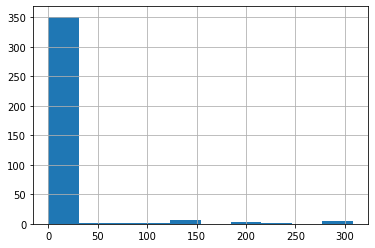

In [14]:
eq_0.hist()

缺失率超过 1/6 

In [15]:
df.columns[eq_0>50].size

18

In [17]:
%matplotlib inline

In [412]:
ops = df.iloc[:, 15:].copy()

In [413]:
eq_0 = (ops==0).sum()

In [414]:
ops.columns = range(354)

In [415]:
H = 1; display(ops.columns[eq_0>H]); ops.columns[eq_0>H].size

Int64Index([ 12,  23,  24,  25,  27,  45,  46,  47,  73,  77,  88,  95, 109,
            134, 150, 161, 162, 163, 196, 204, 207, 215, 222, 283, 298, 331,
            345, 346, 347, 350, 352],
           dtype='int64')

31

可视化空值列的情况（从分布和时序变化情况入手）

many 0 n_columns = 32


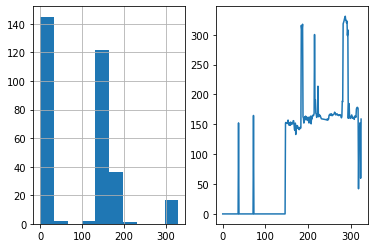

column = 12
n_zeros =  145
mean =  96.29557126602798
var =  8800.840702509338


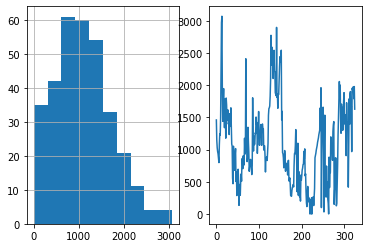

column = 23
n_zeros =  4
mean =  1095.7071060990706
var =  382595.7353741357


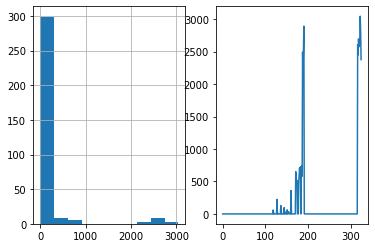

column = 24
n_zeros =  288
mean =  129.7268864630769
var =  271357.1711993013


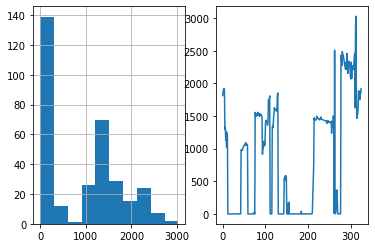

column = 25
n_zeros =  126
mean =  883.2041032387297
var =  726706.7969269729


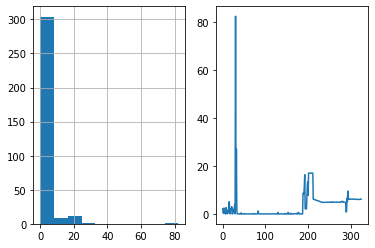

column = 27
n_zeros =  134
mean =  3.2396497526297208
var =  36.16237101296654


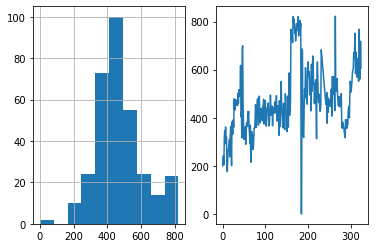

column = 38
n_zeros =  1
mean =  470.7497458040931
var =  19475.821061347993


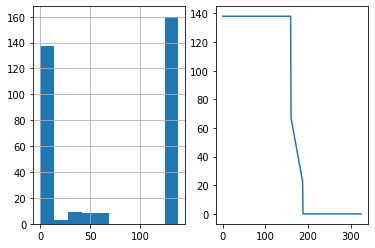

column = 45
n_zeros =  137
mean =  71.79670307692307
var =  4407.875120162856


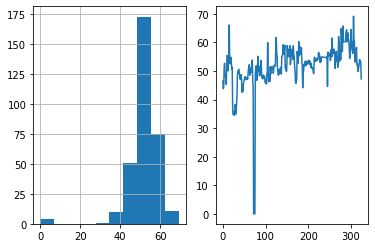

column = 46
n_zeros =  4
mean =  51.84964109210481
var =  62.8411887965605


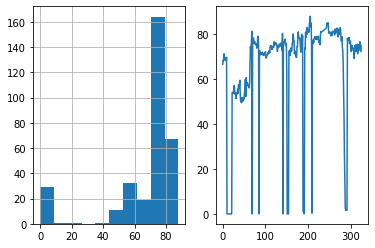

column = 47
n_zeros =  19
mean =  66.01853417695237
var =  508.3994953655987


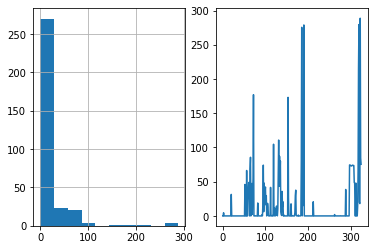

column = 73
n_zeros =  219
mean =  15.475980565199968
var =  1698.1541251379344


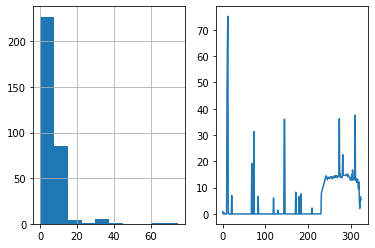

column = 77
n_zeros =  214
mean =  5.031604830576924
var =  83.06388348187838


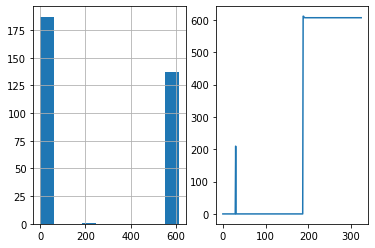

column = 88
n_zeros =  187
mean =  256.56256026153847
var =  89679.27871350407


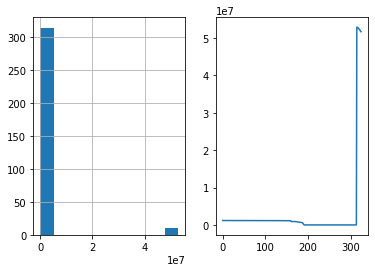

column = 95
n_zeros =  123
mean =  2417178.651207692
var =  87635559112242.06


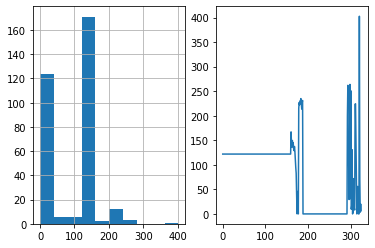

column = 109
n_zeros =  109
mean =  81.49407479282796
var =  4808.137432647388


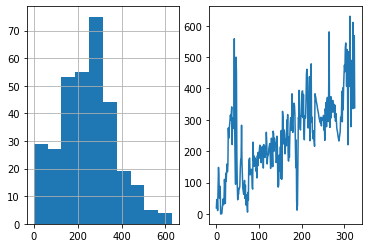

column = 134
n_zeros =  3
mean =  246.39906359335095
var =  15660.75230972451


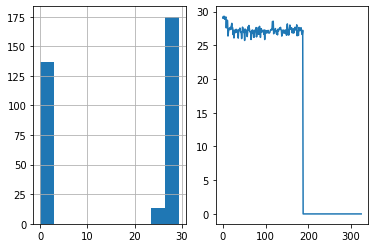

column = 150
n_zeros =  137
mean =  15.765005393369908
var =  181.34843744219546


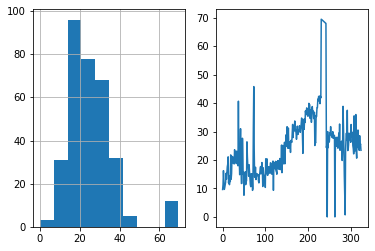

column = 161
n_zeros =  2
mean =  25.336321925572314
var =  144.0213077339358


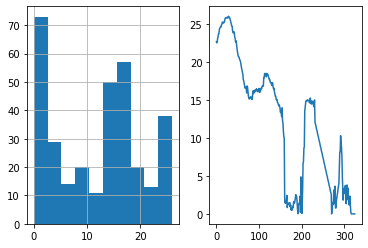

column = 162
n_zeros =  10
mean =  12.030884836589687
var =  66.8756241174203


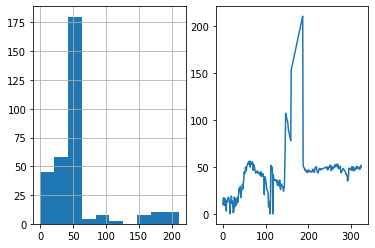

column = 163
n_zeros =  3
mean =  53.61600978877659
var =  1864.603175319041


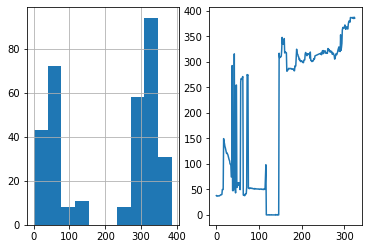

column = 196
n_zeros =  22
mean =  207.1033576888568
var =  18771.21524643706


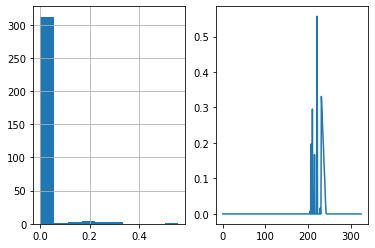

column = 204
n_zeros =  307
mean =  0.009969425043076923
var =  0.002763872949324695


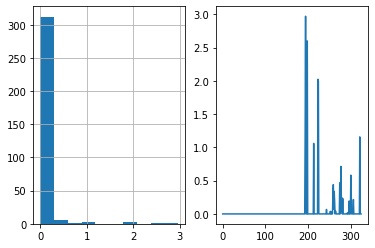

column = 207
n_zeros =  297
mean =  0.054273643899999995
var =  0.08721836851856082


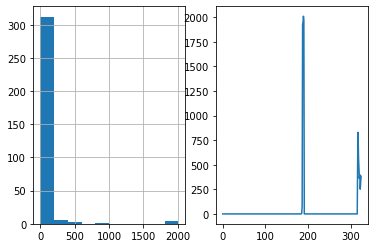

column = 215
n_zeros =  308
mean =  37.22107555369232
var =  52766.585570909396


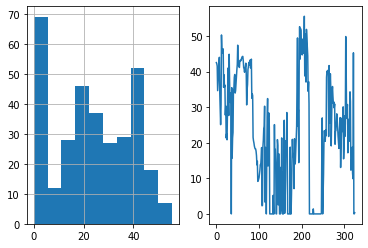

column = 222
n_zeros =  54
mean =  23.383600833464612
var =  252.3939022129706


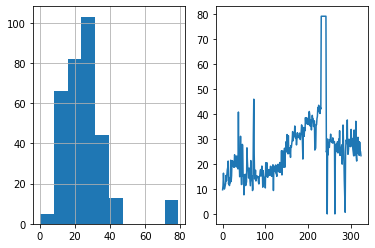

column = 283
n_zeros =  2
mean =  25.8664547207877
var =  181.4558347798876


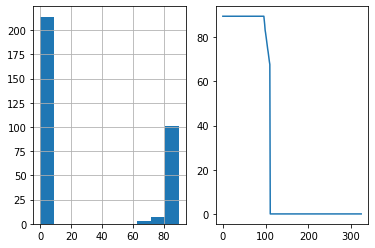

column = 298
n_zeros =  214
mean =  30.033897021831503
var =  1746.4690655792976


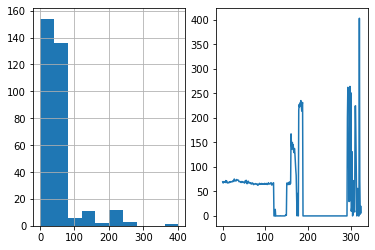

column = 331
n_zeros =  134
mean =  48.573767815027445
var =  3604.6278771029647


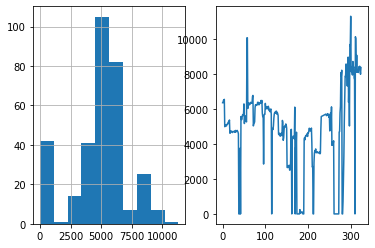

column = 345
n_zeros =  34
mean =  4844.079520534118
var =  5549279.178282852


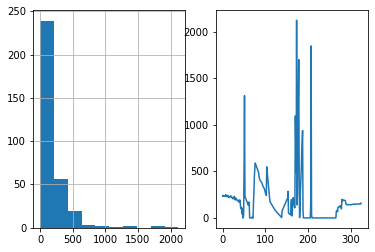

column = 346
n_zeros =  84
mean =  180.35895886620858
var =  63920.36618775997


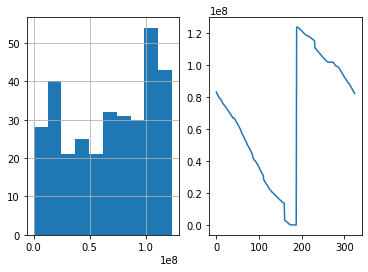

column = 347
n_zeros =  14
mean =  67193797.21922044
var =  1486408801658898.8


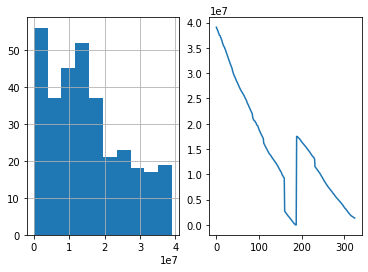

column = 350
n_zeros =  2
mean =  15211257.402864473
var =  112073184767666.78


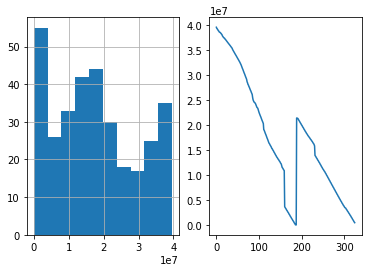

column = 352
n_zeros =  2
mean =  17601419.038560092
var =  137043660644789.86


In [416]:
columns = ops.columns[eq_0>=H]
print(f"many 0 n_columns = {len(columns)}")
for column in columns:
#     plt.set
    plt.subplot(1,2,1)
    (ops[column].hist())
    plt.subplot(1,2,2)
    plt.plot(ops[column].index, ops[column].tolist())
    plt.show()
    print("column =", column)
    print("n_zeros = ",np.count_nonzero(ops[column]==0))
    print("mean = ",np.mean(ops[column]))
    print("var = ",np.var(ops[column]))
    print("="*20)

指定不同的空值处理策略

In [423]:
# 直接删除列
delete_col_list = [12, 24, 25, 45, 46, 219, 214, 88, 95, 109, 150, 204, 207, 215, 222, 298, 331, 346]
# 删除元素
delete_elem_list = [23, 38, 47, 134, 161, 163, 196, 283, 345, 347, 350, 352]
# 不管
keep_going_list = [27, 162]

## 处理空值

In [420]:
# 313 删除的空值变量
ops.isna().sum().sum()

3

In [421]:
for del_col in delete_elem_list:
    mask=(ops[del_col]==0)
    ops.iloc[mask, del_col]=np.nan
    

In [422]:
# 直接删除空值元素
ops.isna().sum().sum()

111

In [426]:
for del_col in delete_col_list:
    ops.pop(del_col)

In [428]:
from sklearn.impute import SimpleImputer

In [430]:
ops_ = SimpleImputer(strategy='mean').fit_transform(ops)

In [431]:
ops = pd.DataFrame(ops_, columns =ops.columns)

In [434]:
ops.columns = [f"op{i}" for i in ops.columns]

## 对df列进行重命名并将ops整合进去

In [437]:
pre_df = df.copy()

In [440]:
pre_df.pop("time");

In [448]:
df1 = pre_df.iloc[:,:7].copy()

In [449]:
df1.columns=[f"raw{i}" for i in range(7)]

In [454]:
df2 = pre_df.iloc[:,7:10]

In [455]:
df2.columns = ["S", "RON", "RON_loss"]

In [458]:
df3 = pre_df.iloc[:,10:14].copy()

In [459]:
df3.columns = [f"prop{i}" for i in range(4)]

In [461]:
X_ = pd.concat([df1, df2, df3, ops], axis=1)

In [463]:
X_.to_csv("processed.csv", index=False)

# 分析取值范围

In [163]:
op_df = pd.read_excel("附件四：354个操作变量信息.xlsx")

In [164]:
op_df["取值范围"]

0        0.20-0.37
1            10-35
2        2.35-2.70
3         600-1000
4          410-435
          ...     
349     60-5500000
350     0-40000000
351    -14000-3500
352     0-40000000
353       -125-0.5
Name: 取值范围, Length: 354, dtype: object

In [165]:
from parse import compile

In [166]:
pattern = compile("{}-{}")

In [167]:
parsed=op_df["取值范围"].apply(lambda x: pattern.parse(x))

In [168]:
op_df["lower"]=pd.to_numeric(parsed.apply(lambda x:eval(x[0])))

In [169]:
op_df["upper"]=pd.to_numeric(parsed.apply(lambda x:eval(x[1].replace("（","(").replace("）",")"))))

In [170]:
for i in range(354):
    s = df.iloc[:, 15 + i]
    min_ = s.min()
    max_ = s.max()
    op_df.loc[i, "lower"] = min(op_df.loc[i, "lower"], min_)
    op_df.loc[i, "upper"] = max(op_df.loc[i, "upper"], max_)

# 对285样本和313样本的处理

In [21]:
d285 = pd.read_csv("285.csv")

In [22]:
d313 = pd.read_csv("313.csv")

In [30]:
for i in range(354):
    logic = ~np.logical_and(d285.iloc[:,i+1]>=op_df.loc[i,"lower"] , d285.iloc[:,i+1]<=op_df.loc[i,"upper"])
    n_invalids = (logic.sum())
    if n_invalids>0:
        print(i, n_invalids)

48 40
83 40
110 40


In [31]:
np.count_nonzero(d285.var()==0)

33

In [32]:
d285.shape

(40, 355)

In [33]:
(d285.var()==0).shape

(354,)

In [34]:
d285[d285.columns[np.all(d285==0, axis=0)]].shape

(40, 11)

In [35]:
d285_ = d285.drop("time", axis=1)

In [64]:
d313_ = d313.drop("time", axis=1)

In [37]:
np.arange(354)[np.all(d285_==0, axis=0)]

array([ 24,  45,  73,  95, 109, 150, 204, 207, 215, 298, 331])

In [38]:
d285_.columns[(d285_==0).sum()>10]

Index(['新氢进装置流量', '1#催化汽油进装置流量', 'D121顶去放火炬流量', '新氢进装置流量.1', 'Unnamed: 110',
       'D-109松动风流量', '进料调节阀旁路流量', '紧急氢气去D-102流量', '补充氢压缩机出口返回管流量',
       'EH-102加热元件/A束温度', 'D-201含硫污水排量'],
      dtype='object')

In [39]:
(d285_[d285_.columns[(d285_==0).sum()>=1]]==0).sum()

新氢进装置流量            40
1#催化汽油进装置流量        40
D121顶去放火炬流量        40
新氢进装置流量.1          40
Unnamed: 110       40
D-109松动风流量         40
进料调节阀旁路流量          40
紧急氢气去D-102流量       40
补充氢压缩机出口返回管流量      40
EH-102加热元件/A束温度    40
D-201含硫污水排量        40
dtype: int64

In [40]:
(d313_[d313_.columns[(d313_==0).sum()>=1]]==0).sum()

新氢进装置流量            40
1#催化汽油进装置流量        40
新氢进装置流量.1          40
Unnamed: 109        2
D-109松动风流量         40
D-106热氮气流量         16
Unnamed: 175        6
进料调节阀旁路流量          40
紧急氢气去D-102流量       40
补充氢压缩机出口返回管流量      40
3.0步骤FIC2432.SP    16
EH-102加热元件/A束温度    40
D-121含硫污水排量         2
dtype: int64

## 313 部分空值填充均值

In [ ]:
column = "Unnamed: 109"

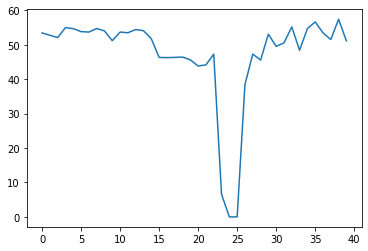

In [65]:
s=d313_["Unnamed: 109"]; plt.plot(s.index, s.tolist()) # 2 zeros [24, 25]

In [66]:
mask = (d313_[column]==0)
d313_.loc[mask, column] = d313_.loc[~mask, column].mean()

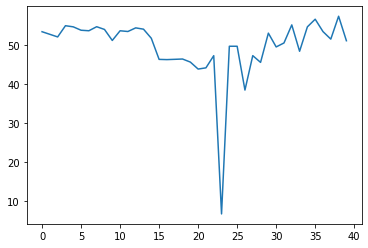

In [67]:
s=d313_[column]; plt.plot(s.index, s.tolist())

In [71]:
column = "D-121含硫污水排量"

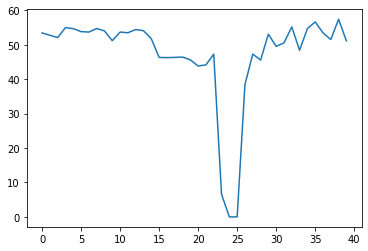

In [72]:
s=d313_[column]; plt.plot(s.index, s.tolist()) # 2 zeros [24, 25]

In [73]:
mask = (d313_[column]==0)
d313_.loc[mask, column] = d313_.loc[~mask, column].mean()

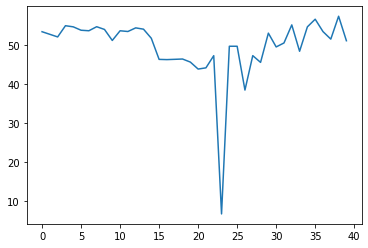

In [74]:
s=d313_[column]; plt.plot(s.index, s.tolist())

## 313 部分空值变量应该删除

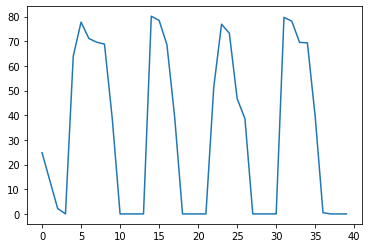

In [43]:
s=d313_["D-106热氮气流量"]; plt.plot(s.index, s.tolist())

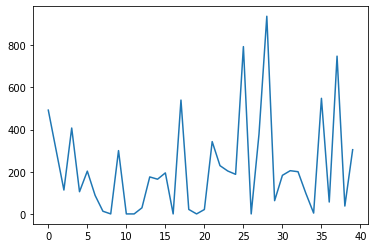

In [44]:
s=d313_["Unnamed: 175"]; plt.plot(s.index, s.tolist()) # 6 zeros

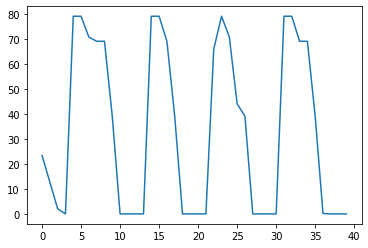

In [45]:
s=d313_["3.0步骤FIC2432.SP"]; plt.plot(s.index, s.tolist()) # 16 zeros

In [84]:
np.arange(354)[d313_.columns.isin(["D-106热氮气流量", "Unnamed: 175", "3.0步骤FIC2432.SP"])]

array([161, 174, 283])

In [419]:
ops.iloc[312,[161, 174, 283]] = np.nan

In [401]:
d313_m[[161, 174, 283]]

D-106热氮气流量          36.018813
Unnamed: 175       162.596557
3.0步骤FIC2432.SP     37.024794
dtype: float64

In [85]:
df.loc[313,:]

time                   2017/5/15 8:00:00
硫含量,μg/g                             392
辛烷值RON                              90.3
饱和烃,v%（烷烃+环烷烃）                     55.05
烯烃,v%                              20.89
                             ...        
8.0MPa氢气至循环氢压缩机入口                1943.69
8.0MPa氢气至循环氢压缩机入口.1          2.14949e+06
8.0MPa氢气至反吹氢压缩机出口                2501.85
8.0MPa氢气至反吹氢压缩机出口.1          2.15416e+06
D101原料缓冲罐压力                     -113.376
Name: 313, Length: 369, dtype: object

In [88]:
df.iloc[312,15:]

氢油比                       0.261936
反应过滤器压差                    17.1835
还原器压力                      2.41706
还原器流化氢气流量                  850.301
反应器上部温度                    424.969
                          ...     
8.0MPa氢气至循环氢压缩机入口          1943.69
8.0MPa氢气至循环氢压缩机入口.1    2.14949e+06
8.0MPa氢气至反吹氢压缩机出口          2501.85
8.0MPa氢气至反吹氢压缩机出口.1    2.15416e+06
D101原料缓冲罐压力               -113.376
Name: 313, Length: 354, dtype: object

In [101]:
not_eq = []
for i,(a, b) in enumerate(zip(df.iloc[312,15:], d313_.mean())):
    if not f"{a:.04}"==f"{b:.04}":
        print(i, a, b)
        not_eq.append(i)
#     print(f"{a:.04}\t{b:.04}")

86 14755121.25 14795000.0
93 18346556.0 18300000.0
98 21155841.0 21200000.0
99 10469520.0 10500000.0
103 48172662.0 48200000.0
104 23661272.0 23700000.0
108 47.222061350000004 49.707433
329 47.222061350000004 49.707433
347 87939278.25 87900000.0


In [175]:
cur_df = d313_
invalids = []
all_invalids=[]
for i in range(354):
    logic = ~np.logical_and(cur_df.iloc[:,i]>=op_df.loc[i,"lower"] , cur_df.iloc[:,i]<=op_df.loc[i,"upper"])
    n_invalids = (logic.sum())
    if n_invalids>0:
        print(i, n_invalids)
        all_invalids.extend(np.arange(40)[logic])

32 3
38 1
42 20
43 4
58 2
62 5
85 2
132 1
155 8
156 10
161 6
174 8
209 3
212 3
216 14
218 4
220 3
240 3
241 4
242 7
243 6
247 2
291 9
316 7
322 1


## 删除313中的超出范围的异常样本

In [336]:
cur_df = d313_
invalids = []
invalid_degrees = np.zeros([40])
for i in range(354):
    logic = ~np.logical_and(cur_df.iloc[:,i]>=op_df.loc[i,"lower"] , cur_df.iloc[:,i]<=op_df.loc[i,"upper"])
    n_invalids = (logic.sum())
    if n_invalids>0:
        for j in range(40):
            if cur_df.iloc[j,i] < op_df.loc[i,"lower"]:
                exceed = op_df.loc[i,"lower"] - cur_df.iloc[j,i]
            elif cur_df.iloc[j,i] > op_df.loc[i,"upper"]:
                exceed = cur_df.iloc[j,i] - op_df.loc[i,"upper"]
            else:
                exceed = 0
            invalid_degrees[j] += exceed / (op_df.loc[i,"upper"] - op_df.loc[i,"lower"])
                

In [338]:
-np.sort(-invalid_degrees)

array([1.98628265e+00, 1.86821617e+00, 1.53131904e+00, 1.51467079e+00,
       1.29830440e+00, 1.05739038e+00, 8.76192771e-01, 8.66199545e-01,
       7.70276000e-01, 6.58064620e-01, 6.04762782e-01, 4.75432321e-01,
       4.66998655e-01, 4.57913571e-01, 4.54182877e-01, 4.47111764e-01,
       4.41699726e-01, 4.40394643e-01, 4.30023264e-01, 4.25066526e-01,
       4.05357143e-01, 1.94649507e-01, 1.07119400e-01, 8.88135411e-02,
       8.57846939e-02, 8.48089307e-02, 7.73301667e-02, 6.88826667e-02,
       6.58551333e-02, 6.28662177e-02, 6.10434966e-02, 5.27568333e-02,
       5.17716071e-02, 5.00271667e-02, 4.64777333e-02, 1.79371667e-02,
       1.76900000e-02, 2.12000000e-03, 4.67111111e-04, 0.00000000e+00])

In [ ]:
plt.hist()

In [339]:
(-invalid_degrees).argsort()[:6]

array([18, 27, 25, 10, 17, 16], dtype=int64)

In [331]:
[item[0] for item in Counter(all_invalids).most_common()[:10]]

[27, 19, 37, 18, 25, 7, 8, 16, 26, 36]

In [334]:
set([item[0] for item in Counter(all_invalids).most_common()[:15]])  &   set((-invalid_degrees).argsort()[:10])

{10, 16, 18, 25, 26, 27, 35, 36, 37}

In [348]:
d313_m = d313_.iloc[np.setdiff1d(np.arange(40), [18, 27, 25, 10, 17, 16]), :].mean()

## 用 pauta criterion 删除异常样本

In [356]:
cur_df = d285_

mean = cur_df.mean()
std = cur_df.std()
cnt = 0
for i, sample in cur_df.iterrows():
    if np.any(np.abs(sample - mean) > std * 3):
        print(i)
        cnt += 1
print(cnt)

0


In [358]:
cur_df = d313_

mean = cur_df.mean()
std = cur_df.std()
cnt = 0
invalids = []
for i, sample in cur_df.iterrows():
    if np.any(np.abs(sample - mean) > std * 3):
        print(i)
        invalids.append(i)
        cnt += 1
print(cnt)

0
3
4
5
7
9
10
11
12
13
15
17
20
21
23
24
25
26
27
28
31
32
34
36
37
38
39
27


In [371]:
d313_m = d313_.iloc[np.setdiff1d(np.arange(40), np.union1d([18, 27, 25, 10, 17, 16], invalids)), :].mean()

In [364]:
np.setdiff1d(np.arange(40), np.union1d([18, 27, 25, 10, 17, 16], invalids))

array([ 1,  2,  6,  8, 14, 19, 22, 29, 30, 33, 35])

In [368]:
np.union1d([18, 27, 25, 10, 17, 16], invalids).size

29

## 将285与313的数据赋值到df

In [403]:
pd.isna(d313_m).sum()

0

In [372]:
d313_m

氢油比                    2.621217e-01
反应过滤器压差                1.722987e+01
还原器压力                  2.416984e+00
还原器流化氢气流量              8.505484e+02
反应器上部温度                4.249020e+02
                           ...     
8.0MPa氢气至循环氢压缩机入口      2.023978e+03
8.0MPa氢气至循环氢压缩机入口.1    2.149370e+06
8.0MPa氢气至反吹氢压缩机出口      2.494629e+03
8.0MPa氢气至反吹氢压缩机出口.1    2.153988e+06
D101原料缓冲罐压力           -1.133767e+02
Length: 354, dtype: float64

In [376]:
d285_m = d285_.mean()

In [377]:
d285_m

氢油比                    2.733991e-01
反应过滤器压差                2.420824e+01
还原器压力                  2.528870e+00
还原器流化氢气流量              8.558825e+02
反应器上部温度                4.215093e+02
                           ...     
8.0MPa氢气至循环氢压缩机入口      2.200789e+03
8.0MPa氢气至循环氢压缩机入口.1    5.149259e+06
8.0MPa氢气至反吹氢压缩机出口      2.846897e+03
8.0MPa氢气至反吹氢压缩机出口.1    5.984749e+06
D101原料缓冲罐压力           -9.721070e+01
Length: 354, dtype: float64

In [409]:
df.iloc[312, 15:] = d313_m.values

In [410]:
df.iloc[284, 15:] = d285_m.values

In [411]:
df.isna().sum().sum()

0

# 探索性建模

In [317]:
df.to_csv("raw_data.csv", index=False)

In [318]:
df = pd.read_csv("raw_data.csv")

In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:
from sklearn.preprocessing import MinMaxScaler

In [186]:
from sklearn.preprocessing import PowerTransformer

In [187]:
from sklearn.preprocessing import QuantileTransformer

In [190]:
y = df["RON损失\n（不是变量）"]

sample_index
1      1.38
2      1.18
3      1.38
4      1.38
5      1.28
       ... 
321    1.15
322    1.25
323    1.35
324    1.28
325    1.25
Name: RON损失\n（不是变量）, Length: 325, dtype: float64

In [464]:
X_2 = X_.copy()

In [465]:
y = X_2.pop("RON_loss")

In [466]:
X = X_2

In [198]:
from sklearn.preprocessing import StandardScaler

In [199]:
from sklearn.pipeline import Pipeline

In [200]:
from sklearn.decomposition import PCA, FastICA

In [229]:
from sklearn.linear_model import Ridge

In [239]:
!pip install lightgbm

In [204]:
from sklearn.model_selection import KFold, train_test_split

In [210]:
X = X.astype(float)

In [223]:
y = y.astype(float).to_numpy()

In [469]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [228]:
y_train.dtype

dtype('float64')

In [261]:
from lightgbm import LGBMRegressor

In [264]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

In [525]:
from sklearn.linear_model import ElasticNet, BayesianRidge, Lasso

In [293]:
from sklearn.feature_selection import SelectFromModel

In [532]:
from sklearn.preprocessing import RobustScaler

In [573]:
X_trans.std()

0.2941971260876282

In [632]:
selector = SelectFromModel(estimator=GradientBoostingRegressor(random_state=0))

In [642]:
X_ = QuantileTransformer(n_quantiles=1000).fit_transform(X)

c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (325). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [643]:
X_ = selector.fit_transform(X, y)

In [644]:
X_ = selector.fit_transform(X_, y)

In [645]:
X_.shape

(325, 26)

In [639]:
X_train, X_test, y_train, y_test = train_test_split(
     X_, y, test_size=0.33, random_state=42)

In [648]:
pipeline = Pipeline([
#     ("scale", StandardScaler()),
#     ("scale2", RobustScaler()),
    ("transform", QuantileTransformer(n_quantiles=1000)),
#     ("select", SelectFromModel(estimator=GradientBoostingRegressor(random_state=0))),
#     ("pca", PCA(n_components=30)),
#     ("ica", FastICA(n_components=15)),
     ("regressor", LGBMRegressor(random_state=0, n_estimators=100, learning_rate=0.1)),
#     ("regressor", BayesianRidge(normalize=True)),
])

In [649]:
cross_val_score(pipeline, X_, y, cv=cv).mean()

c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (260). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (260). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (260). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (260). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWa

0.38709457699393846

In [624]:
pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("scale2", RobustScaler()),
    ("transform", QuantileTransformer(n_quantiles=2000)),
#     ("select", SelectFromModel(estimator=GradientBoostingRegressor(random_state=0))),
    ("pca", PCA(n_components=30)),
    ("ica", FastICA(n_components=15)),
#      ("regressor", LGBMRegressor(random_state=0, n_estimators=100, learning_rate=0.1)),
    ("regressor", BayesianRidge(normalize=True)),
])

In [625]:
cross_val_score(pipeline, X_, y, cv=cv).mean()

c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (2000) is greater than the total number of samples (260). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (2000) is greater than the total number of samples (260). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (2000) is greater than the total number of samples (260). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (2000) is greater than the total number of samples (260). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWa

0.16148203548560197

In [623]:
X.shape

(325, 349)

In [640]:
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (217). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


0.11742715140447113

In [480]:
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (2000) is greater than the total number of samples (217). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


0.12825366796013127

In [296]:
y_pred = pipeline.predict(X_test)

In [299]:
from sklearn.model_selection import cross_val_score

In [297]:
import pylab as plt

In [473]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)

In [474]:
cross_val_score(pipeline, X, y, cv=cv).mean()

c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (2000) is greater than the total number of samples (260). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (2000) is greater than the total number of samples (260). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (2000) is greater than the total number of samples (260). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (2000) is greater than the total number of samples (260). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWa

array([0.24387199, 0.08346677, 0.21650902, 0.13021928, 0.08092405])

In [475]:
_.mean()

0.15099822053057504

In [309]:
pipeline.fit(X, y)

c:\software\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (2000) is greater than the total number of samples (325). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


Pipeline(steps=[('scale', StandardScaler()),
                ('transform', QuantileTransformer(n_quantiles=2000)),
                ('select', SelectFromModel(estimator=ExtraTreesRegressor())),
                ('pca', PCA(n_components=30)),
                ('ica', FastICA(n_components=15)),
                ('regressor', BayesianRidge(normalize=True))])

In [310]:
y_pred = pipeline.predict(X)

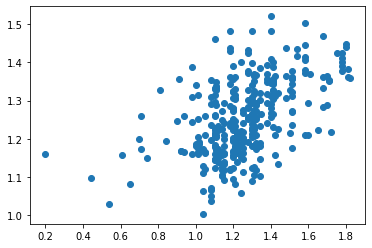

In [311]:
plt.scatter(y, y_pred)

In [315]:
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

0.2551673906107038

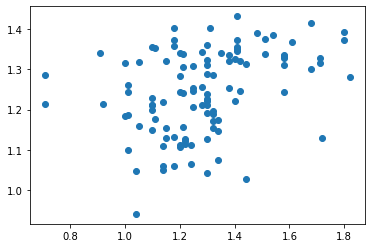

In [298]:
plt.scatter(y_test, y_pred)